# Project 1 DATA 620
## Authour: Frederick Jones
### Date: 18th Feb 2024

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

The data for this project was found on the github uploaded by Melanie Walsh. The data is about the political books published around 2004. Political books can be categorized as neutral, conservative and liberal. So the data contains categorical attributes for each node. The attributes are neutral, conservative and liberal.
### Load the dataset from github using pandas.read_csv()

In [5]:
nodes_df = pd.read_csv('https://raw.githubusercontent.com/melaniewalsh/sample-social-network-datasets/master/sample-datasets/political-books/political-books-nodes.csv')

In [6]:
edges_df = pd.read_csv("https://raw.githubusercontent.com/melaniewalsh/sample-social-network-datasets/master/sample-datasets/political-books/political-books-edges.csv")

In [7]:
nodes_df.political_ideology.unique()

array(['neutral', 'conservative', 'liberal'], dtype=object)

### write functions that can change the labels in each column. 
If we just print every label like 'Conservative', the network will become a clutter. Therefore, we can use abbreviation as C for conservative, N for neutral, and L for 'liberal'

In [8]:
def label_encoder(x):
    if x=='neutral':
        return 'N'
    elif x=='conservative':
        return 'C'
    else: return 'L'

def label_decoder(x):
    if x=='N':
        return 'neutral'
    elif x=='C':
        return 'conservative'
    else: return 'liberal'
        

Use the label_encoder function defined above to put abbreviations instead of full words

In [9]:
nodes_df.political_ideology = nodes_df.political_ideology.apply(label_encoder)

In [10]:
nodes_df.head()

,Id,Label,political_ideology
0,0,1000 Years for Revenge,N
1,1,Bush vs. the Beltway,C
2,2,Charlie Wilson's War,C
3,3,Losing Bin Laden,C
4,4,Sleeping With the Devil,N


In [11]:
edges_df.head()

,Source,Target,Weight
0,1,0,1
1,2,0,1
2,3,0,1
3,3,1,1
4,4,0,1


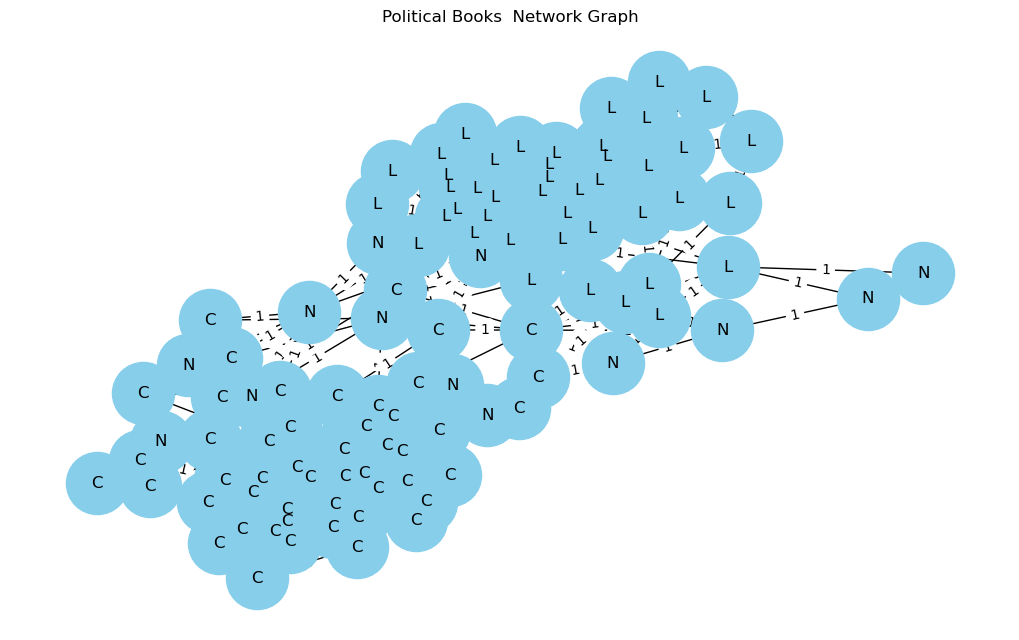

### Calculate degree centrality and eigenvector centrality for each political ideology group

In [13]:
degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter = 500)

In [14]:
centrality_df = pd.DataFrame({'Degree Centrality': degree_centrality, 'Eigenvector Centrality': eigenvector_centrality})
centrality_df = pd.merge(nodes_df, centrality_df, left_on='Id', right_index=True)
centrality_df.political_ideology = centrality_df.political_ideology.apply(label_decoder)
centrality_df.head()

,Id,Label,political_ideology,Degree Centrality,Eigenvector Centrality
0,0,1000 Years for Revenge,neutral,0.057692,0.016812
1,1,Bush vs. the Beltway,conservative,0.038462,0.012289
2,2,Charlie Wilson's War,conservative,0.038462,0.011851
3,3,Losing Bin Laden,conservative,0.221154,0.077091
4,4,Sleeping With the Devil,neutral,0.076923,0.046648


### Calculate the mean degree centrality and the mean eigenvector centrality for each political ideology group

In [15]:
political_ideology = ['conservative', 'liberal', 'neutral']
deg_cent = []
eig_cent = []
for i in range(3):
    deg_cent.append(centrality_df[centrality_df['political_ideology']==political_ideology[i]]['Degree Centrality'].mean())
    eig_cent.append(centrality_df[centrality_df['political_ideology']==political_ideology[i]]['Eigenvector Centrality'].mean())
df_centrality  = pd.DataFrame({'political_ideology':political_ideology,  'Mean Degree Centrality': deg_cent, 'Mean Eigenvector Centrality': eig_cent})
df_centrality 

,political_ideology,Mean Degree Centrality,Mean Eigenvector Centrality
0,conservative,0.083595,0.037371
1,liberal,0.084973,0.117132
2,neutral,0.056213,0.038182


### Maximum Degree Centrality and Maximum eigen centrality

In [16]:
#Group by political ideology and calculate mean centrality measures
centrality_df.groupby('political_ideology').max()

,Id,Label,Degree Centrality,Eigenvector Centrality
political_ideology,,,,
conservative,77,Why Courage Matters,0.240385,0.093562
liberal,102,Worse Than Watergate,0.221154,0.296894
neutral,104,Why America Slept,0.125000,0.198157


### Minimum Degree Centrality and Minimum eigen centrality

In [17]:
centrality_df.groupby('political_ideology').min()

,Id,Label,Degree Centrality,Eigenvector Centrality
political_ideology,,,,
conservative,1,A National Party No More,0.028846,0.010445
liberal,30,Against All Enemies,0.028846,0.019691
neutral,0,1000 Years for Revenge,0.019231,0.004662
